> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

# Homework

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Problems [Part 1](./01_Cheers_Stats_Beers.md)

1. Gordon Moore created an empirical prediction that the rate of
semiconductors on a computer chip would double every two years. This
prediction was known as Moore's law. Gordon Moore had originally only
expected this empirical relation to hold from 1965 - 1975
[[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)],
but semiconductor manufacturers were able to keep up with Moore's law
until 2015. 

In the folder "../data" is a comma separated value (CSV) file,
"transistor_data.csv" [taken from wikipedia
01/2020](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors).

a. Use the `!head ../data/transistor_data.csv` command to look at
the top of the csv. What are the headings for the columns?

b. Load the csv into a pandas dataframe. How many missing values
(`NaN`) are
in the column with the number of transistors? What fraction are
missing?

In [2]:
!head "../data/transistor_data.csv"
'''Headings are: Processor, MOS transistor count, Date of Introduction, Designer, MOSprocess, and Area'''

Processor,MOS transistor count,Date of Introduction,Designer,MOSprocess,Area
"MP944 (20-bit, 6-chip)",NaN,1970,Garrett AiResearch,?,?
"Intel 4004 (4-bit, 16-pin)",2250,1971,Intel,"10,000 nm",12 mm²
"Intel 8008 (8-bit, 18-pin)",3500,1972,Intel,"10,000 nm",14 mm²
"NEC μCOM-4 (4-bit, 42-pin)",2500,1973,NEC,"7,500 nm",?
"Intel 4040 (4-bit, 16-pin)",3000,1974,Intel,"10,000 nm",12 mm²
"Motorola 6800 (8-bit, 40-pin)",4100,1974,Motorola,"6,000 nm",16 mm²
"Intel 8080 (8-bit, 40-pin)",6000,1974,Intel,"6,000 nm",20 mm²
"TMS 1000 (4-bit, 28-pin)",8000,1974,Texas Instruments,"8,000 nm",11 mm²
"MOS Technology 6502 (8-bit, 40-pin)",4528,1975,MOS Technology,"8,000 nm",21 mm²


'Headings are: Processor, MOS transistor count, Date of Introduction, Designer, MOSprocess, and Area'

In [3]:
df = pd.read_csv('../data/transistor_data.csv')

no_nan = df['MOS transistor count'].dropna()
no_nan = no_nan.values

with_nan = df['MOS transistor count'].values

nan_values = len(with_nan) - len(no_nan)
print('The number of nan values in the column labeled "MOS transistor count" is', nan_values)

pct_missing = (nan_values/len(with_nan))*100
print('This percentage of missing column values is approx.', pct_missing,'%')

The number of nan values in the column labeled "MOS transistor count" is 7
This percentage of missing column values is approx. 3.763440860215054 %


## Problems [Part 2](./02_Seeing_Stats.md)

1. Many beers do not report the IBU of the beer because it is very
small. You may be accidentally removing whole categories of beer from
our dataset by removing rows that do not include the IBU measure. 

    a. Use the command `beers_filled = beers.fillna(0)` to clean the `beers` dataframe
    
    b. Recreate the plot "Beer ABV vs. IBU mean values by style" 
    [bubble
    plot](https://cooperrc.github.io/computational-mechanics/module_02/02_Seeing_Stats.html#bubble-chart) with `beers_filled`. What differences do you notice between the plots?

'A notable difference between the two plots would be the higher central concentration/location of points in this new plot. Additionally, the new plot now has more styles attached to bubbles, accounting for those that were ignored when nan values were dropped. There is also a new concentration of styles with a 0 IBU value.'

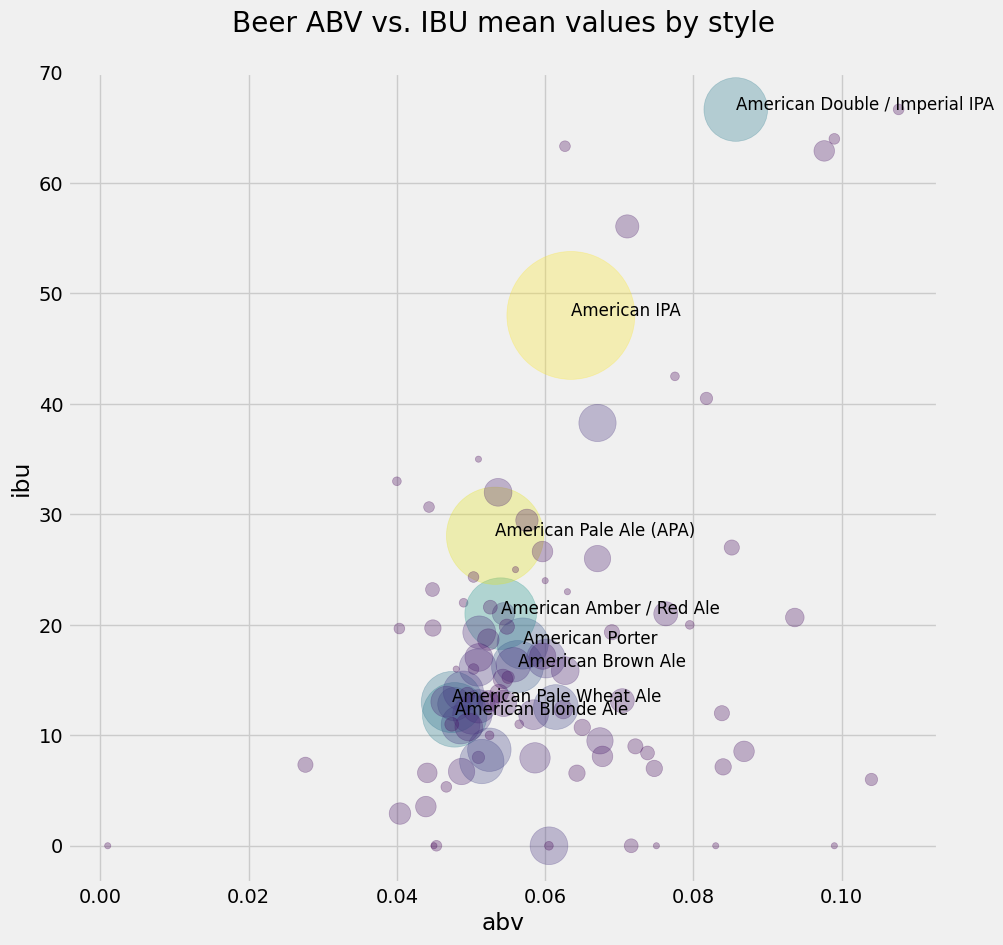

In [4]:
from matplotlib import cm

beers = pd.read_csv("../data/beers.csv")
beers_filled = beers.fillna(0)

beers_styles = beers_filled.drop(['Unnamed: 0','name','brewery_id','ounces','id'], axis=1)
style_counts = beers_styles['style'].value_counts()
style_means = beers_styles.groupby('style').mean()

style_counts = style_counts.sort_index()
style_counts[0:10]

colors = cm.viridis(style_counts.values)

ax = style_means.plot.scatter(figsize=(10,10), 
                               x='abv', y='ibu', s=style_counts*20, color=colors,
                               title='Beer ABV vs. IBU mean values by style\n',
                               alpha=0.3);

for i, txt in enumerate(list(style_counts.index.values)):
    if style_counts.values[i] > 65:
        ax.annotate(txt, (style_means.abv.iloc[i],style_means.ibu.iloc[i]), fontsize=12)
        
'''A notable difference between the two plots would be the higher central concentration/location of points in this new plot. Additionally, the new plot now has more styles attached to bubbles, accounting for those that were ignored when nan values were dropped. There is also a new concentration of styles with a 0 IBU value.'''

2. Gordon Moore created an empirical prediction that the rate of
semiconductors on a computer chip would double every two years. This
prediction was known as Moore's law. Gordon Moore had originally only
expected this empirical relation to hold from 1965 - 1975
[[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)],
but semiconductor manufacturers were able to keep up with Moore's law
until 2015. 

    In the folder "../data" is a comma separated value (CSV) file, "transistor_data.csv" [taken from wikipedia 01/2020](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors). 
    Load the csv into a pandas dataframe, it has the following headings:

    |Processor| MOS transistor count| Date of Introduction|Designer|MOSprocess|Area|
    |---|---|---|---|---|---|

    a. In the years 2017, what was the average MOS transistor count? 
    Make a boxplot of the transistor count in 2017 and find the first, second and third quartiles.

    b. Create a semilog y-axis scatter plot (i.e. `plt.semilogy`) for the 
    "Date of Introduction" vs "MOS transistor count". 
    Color the data according to the "Designer".

                    Processor  MOS transistor count  Date of Introduction  \
0      MP944 (20-bit, 6-chip)                   NaN                  1970   
1  Intel 4004 (4-bit, 16-pin)                2250.0                  1971   
2  Intel 8008 (8-bit, 18-pin)                3500.0                  1972   
3  NEC μCOM-4 (4-bit, 42-pin)                2500.0                  1973   
4  Intel 4040 (4-bit, 16-pin)                3000.0                  1974   

             Designer MOSprocess    Area  
0  Garrett AiResearch          ?       ?  
1               Intel  10,000 nm  12 mm²  
2               Intel  10,000 nm  14 mm²  
3                 NEC   7,500 nm       ?  
4               Intel  10,000 nm  12 mm²  
                                             Processor  MOS transistor count  \
152  Qualcomm Snapdragon 845 (octa-core 64/32-bit A...          5.300000e+09   
153  Qualcomm Snapdragon 850  (octa-core 64/32-bit ...          5.300000e+09   
154  Apple A11 Bionic (hexa-core 64/32-

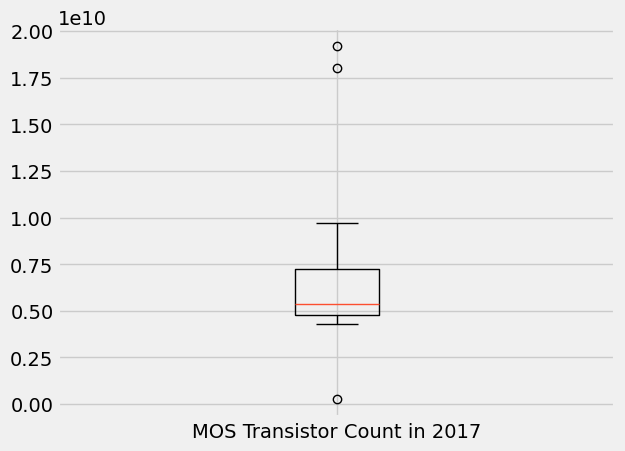

In [5]:
df = pd.read_csv('../data/transistor_data.csv')
print(df.head()) #to check the headings of the dataframe

trans_data = df.loc[df['Date of Introduction'] == 2017]
print(trans_data)

mos_sum = trans_data['MOS transistor count'].values.sum()
mos_count = len(trans_data['MOS transistor count'].values)

avg_mos_count = mos_sum/mos_count
print('In 2017, the average MOS transistor count was', avg_mos_count)

#Boxplot and quartiles:
mos = trans_data['MOS transistor count'].values

plt.boxplot(mos, labels=['MOS Transistor Count in 2017']);
Q1_mos = np.percentile(mos, q=25)
Q2_mos = np.percentile(mos, q=50)
Q3_mos = np.percentile(mos, q=75)

print('The first quartile for abv is {}'.format(Q1_mos))
print('The second quartile for abv is {}'.format(Q2_mos))
print('The third quartile for abv is {}'.format(Q3_mos))

## Problems [Part 3](03_Linear_Regression_with_Real_Data.md)

1. There is a csv file in '../data/primary-energy-consumption-by-region.csv' that has the energy consumption of different regions of the world from 1965 until 2018 [Our world in Data](https://ourworldindata.org/energy). 
Compare the energy consumption of the United States to all of Europe. Load the data into a pandas dataframe. *Note: you can get certain rows of the data frame by specifying what you're looking for e.g. 
`EUR = dataframe[dataframe['Entity']=='Europe']` will give us all the rows from Europe's energy consumption.*

    a. Plot the total energy consumption of the United States and Europe
    
    b. Use a linear least-squares regression to find a function for the energy consumption as a function of year
    
    energy consumed = $f(t) = At+B$
    
    c. At what year would you change split the data and use two lines like you did in the 
    land temperature anomoly? Split the data and perform two linear fits. 
    
    d. What is your prediction for US energy use in 2025? How about European energy use in 2025?

In [6]:
energy = pd.read_csv('../data/primary-energy-consumption-by-region.csv')

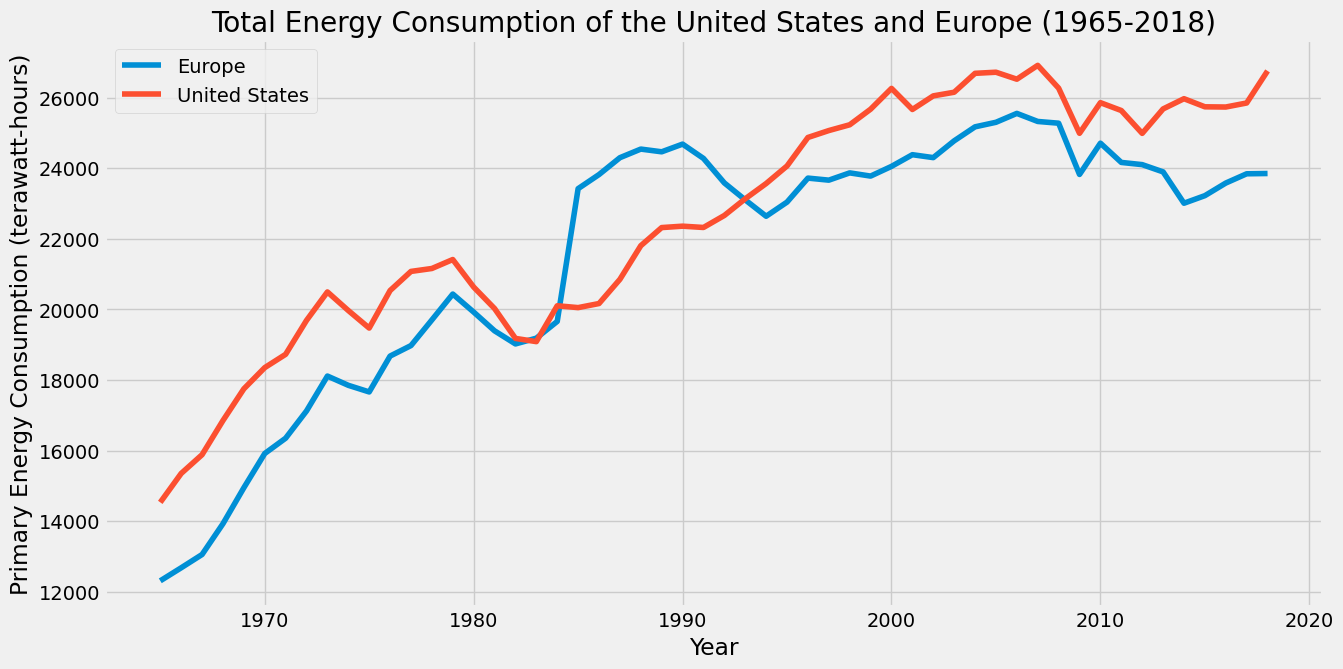

In [7]:
#Part a

us_data = energy[energy['Entity'] == 'United States']
euro_data = energy[energy['Entity'] == 'Europe']

plt.figure(figsize=(14, 7))
plt.plot(euro_data['Year'], euro_data['Primary Energy Consumption (terawatt-hours)'], label='Europe')
plt.plot(us_data['Year'], us_data['Primary Energy Consumption (terawatt-hours)'], label='United States')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption (terawatt-hours)')
plt.title('Total Energy Consumption of the United States and Europe (1965-2018)')
plt.legend()
plt.grid(True)
plt.show()

US Function:   
200.4 x - 3.765e+05
Euro Function:   
199.6 x - 3.76e+05


'The first plot represents US data, the second European. This is more important for part c.'

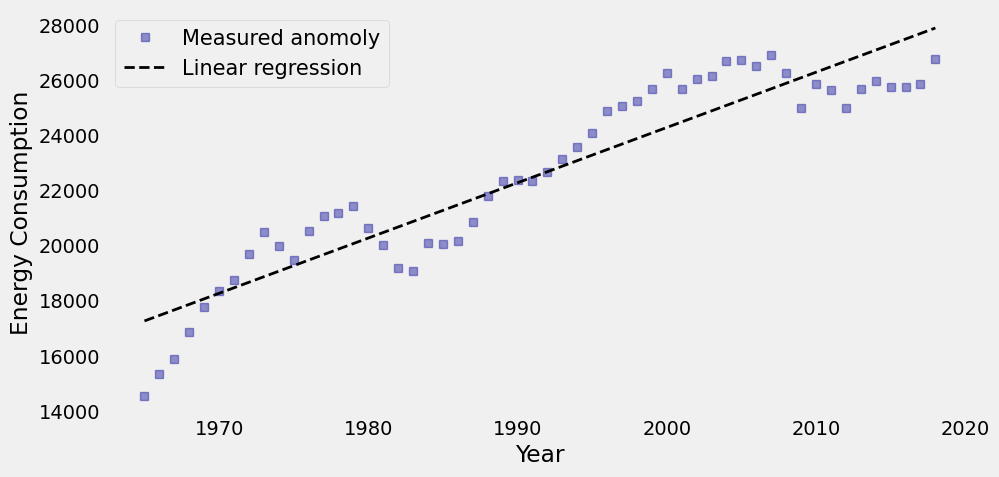

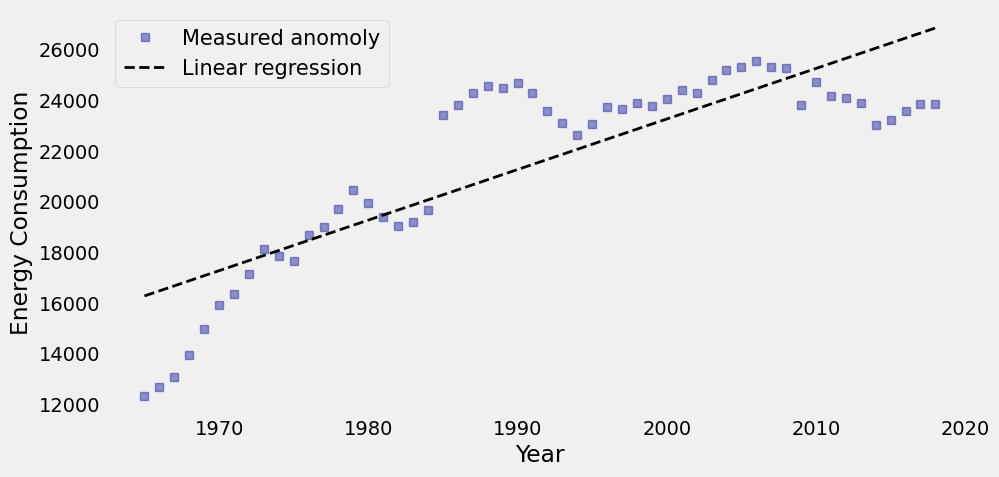

In [8]:
#Part b

def regression_function(df):
    x = df['Year']
    y = df['Primary Energy Consumption (terawatt-hours)']
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    xi = df['Year'].values
    yi = df['Primary Energy Consumption (terawatt-hours)'].values
    x_mean = np.mean(xi)
    y_mean = np.mean(yi)

    a_1 = np.sum(yi*(xi - x_mean)) / np.sum(xi*(xi - x_mean))
    a_0 = y_mean - a_1*x_mean

    a_1n, a_0n = np.polyfit(xi, yi, 1)

    f_linear = np.poly1d((a_1n, a_0n)) 
    
    plt.figure(figsize=(10, 5))

    plt.plot(xi, yi,'s', color='#2929a3', linewidth=1, alpha=0.5,label='Measured anomoly')
    plt.plot(xi, f_linear(xi), 'k--', linewidth=2, label='Linear regression')
    plt.xlabel('Year')
    plt.ylabel('Energy Consumption')
    plt.legend(loc='best', fontsize=15)
    plt.grid();
    
    return f_linear

us_function = regression_function(us_data)
print("US Function: ",us_function)
euro_function = regression_function(euro_data)
print("Euro Function: ",euro_function)
'''The first plot represents US data, the second European. This is more important for part c.'''

'It seems, as evident from the graphs above (part b), that the European data has a strange change in behavior around 1985. Therefore, this is what will be used for the data split. The split data graph can be seen above.'

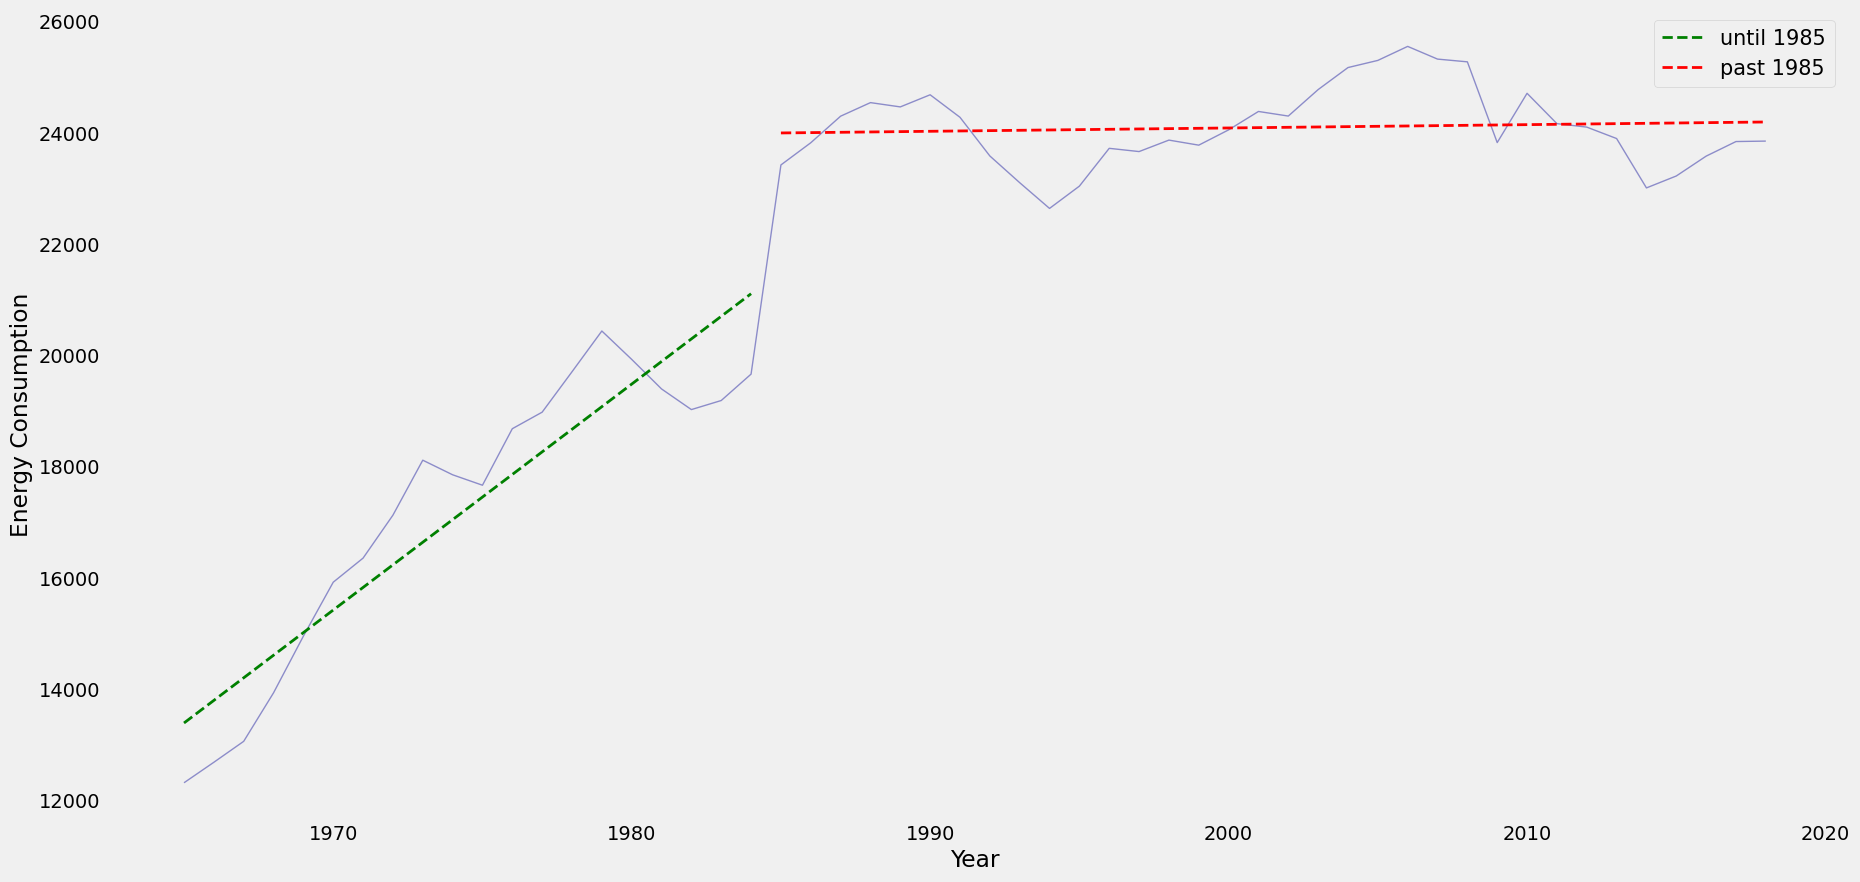

In [9]:
#Part c

def regression_function(df):
    x = df['Year']
    y = df['Primary Energy Consumption (terawatt-hours)']
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    xi = df['Year'].values
    yi = df['Primary Energy Consumption (terawatt-hours)'].values
    x_mean = np.mean(xi)
    y_mean = np.mean(yi)

    a_1 = np.sum(yi*(xi - x_mean)) / np.sum(xi*(xi - x_mean))
    a_0 = y_mean - a_1*x_mean

    a_1n, a_0n = np.polyfit(xi, yi, 1)
    
    return x, y, xi, yi

x, y, xi, yi = regression_function(euro_data)

np.where(xi==1985)

year = x
energy_ano = y

year_1 , energy_ano_1 = year[0:20], energy_ano[0:20]
year_2 , energy_ano_2 = year[20:], energy_ano[20:]

m1, b1 = np.polyfit(year_1, energy_ano_1, 1)
m2, b2 = np.polyfit(year_2, energy_ano_2, 1)

f_linear_1 = np.poly1d((m1, b1))
f_linear_2 = np.poly1d((m2, b2))

plt.figure(figsize=(20, 10))
plt.plot(year, energy_ano, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
plt.plot(year_1, f_linear_1(year_1), 'g--', linewidth=2, label='until 1985')
plt.plot(year_2, f_linear_2(year_2), 'r--', linewidth=2, label='past 1985')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend(loc='best', fontsize=15)
plt.grid();

'''It seems, as evident from the graphs above (part b), that the European data has a strange change in behavior around 1985. Therefore, this is what will be used for the data split. The split data graph can be seen above.'''

In [10]:
#Part d

print('x=2025')
print(' ')
print("US function: ",us_function)
us_energy_usage = (200.4*2025) - (3.765*(10^5))
print("Predicted US energy usage in 2025: ",us_energy_usage,"TW-h")
print(' ')
print("European function: ",euro_function)
euro_energy_usage = (199.6*2025) - (3.76*(10^5))
print("Predicted Europe energy usage in 2025: ",euro_energy_usage,"TW-h")

'''The year 2025 equates to x=2025 for our functions found in part b. Using these functions, we can predict the y values (energy consumption), as seen above. '''

x=2025
 
US function:   
200.4 x - 3.765e+05
Predicted US energy usage in 2025:  405753.525 TW-h
 
European function:   
199.6 x - 3.76e+05
Predicted Europe energy usage in 2025:  404133.6 TW-h


'The year 2025 equates to x=2025 for our functions found in part b. Using these functions, we can predict the y values (energy consumption), as seen above. '

2. You plotted Gordon Moore's empirical prediction that the rate of semiconductors on a computer chip would double every two years in [02_Seeing_Stats](./02_Seeing_Stats). This prediction was known as Moore's law. Gordon Moore had originally only expected this empirical relation to hold from 1965 - 1975 [[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)], but semiconductor manufacturers were able to keep up with Moore's law until 2015. 

Use a linear regression to find your own historical Moore's Law.    

Use code from [02_Seeing_Stats](./02_Seeing_Stats) to plot the semilog y-axis scatter plot 
(i.e. `plt.semilogy`) for the "Date of Introduction" vs "MOS transistor count". 
Color the data according to the "Designer".

Create a linear regression for the data in the form of 

$log(transistor~count)= f(date) = A\cdot date+B$

rearranging

$transistor~count= e^{f(date)} = e^B e^{A\cdot date}$

You can perform a least-squares linear regression using the following assignments

$x_i=$ `dataframe['Date of Introduction'].values`

and

$y_i=$ as `np.log(dataframe['MOS transistor count'].values)`

a. Plot your function on the semilog y-axis scatter plot

b. What are the values of constants $A$ and $B$ for our Moore's law fit? How does this compare to Gordon Moore's prediction that MOS transistor count doubles every two years?

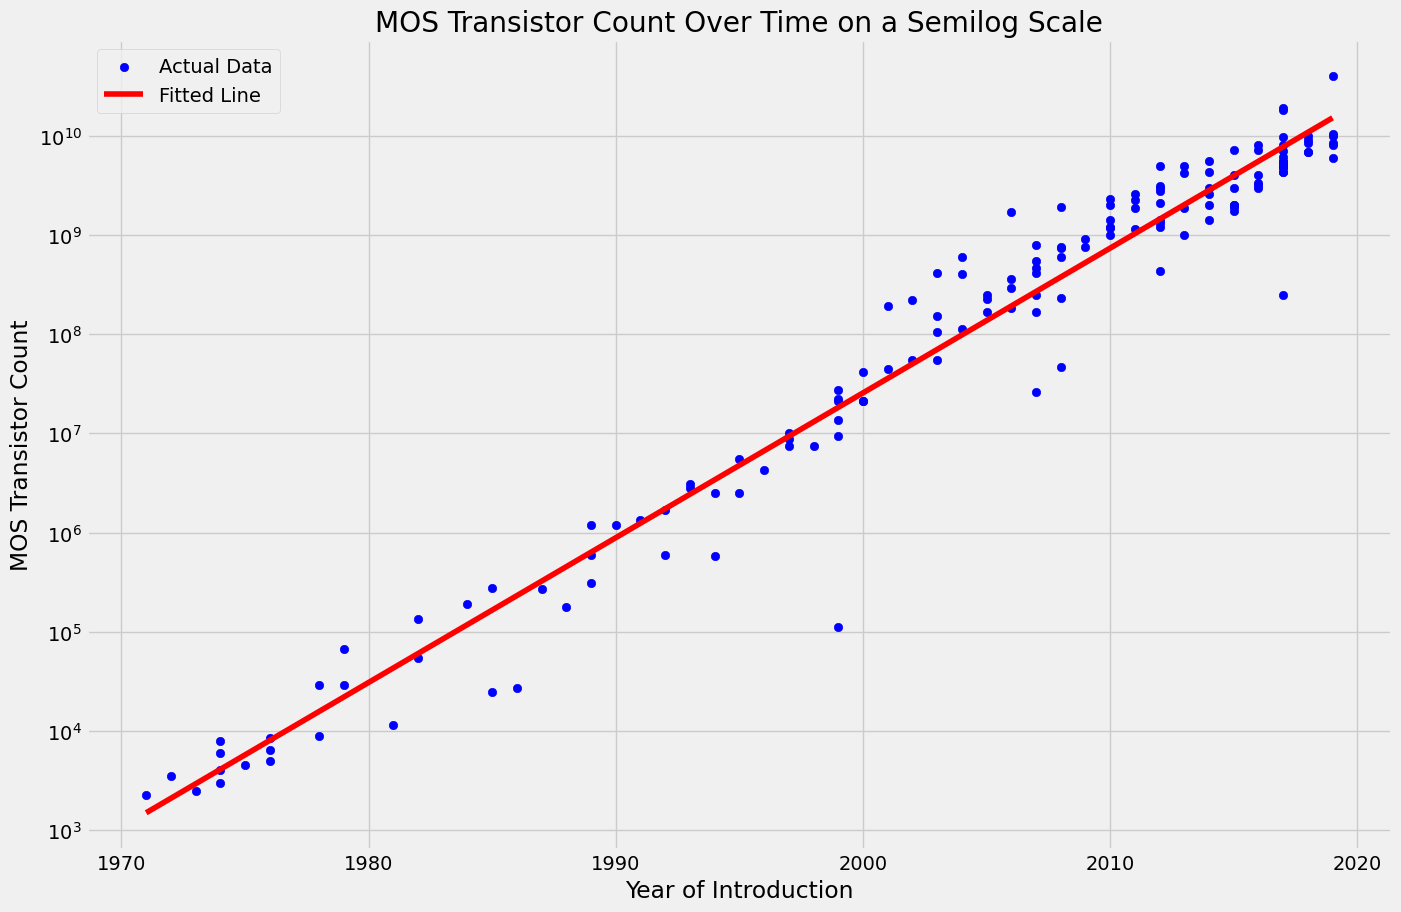

In [11]:
#Part a

data = pd.read_csv('../data/transistor_data.csv')
data = data.dropna()

xi=data['Date of Introduction'].values
TC=data['MOS transistor count'].values
yi=np.log(data['MOS transistor count'].values)

x_mean = np.mean(xi)
y_mean = np.mean(yi)

a_1n, a_0n = np.polyfit(xi, yi, 1)

f_linear = np.poly1d((a_1n, a_0n)) 

plt.figure(figsize=(15, 10))

plt.scatter(xi, np.exp(yi), label='Actual Data', color='blue')
plt.semilogy(xi, np.exp(f_linear(xi)), label='Fitted Line', color='red')
plt.xlabel('Year of Introduction')
plt.ylabel('MOS Transistor Count')
plt.title('MOS Transistor Count Over Time on a Semilog Scale')
plt.legend()

plt.show()

In [12]:
print("The function for the linear regression is: ",f_linear)

'''Therefore, the value for A is 0.3359 and the value for B is -654.7. With the knowledge that the slope of Moores prediction function is approx. log(2)/2, or 0.35, we can compare this to the slope found for our function, which is approx. 0.34. This shows that our function is comparable with Moores, and predicts a similar behavior for the MOS transistor count.'''

The function for the linear regression is:   
0.3359 x - 654.7


'Therefore, the value for A is 0.3359 and the value for B is -654.7. With the knowledge that the slope of Moores prediction function is approx. log(2)/2, or 0.35, we can compare this to the slope found for our function, which is approx. 0.34. This shows that our function is comparable with Moores, and predicts a similar behavior for the MOS transistor count.'

## Problems [Part 4](04_Stats_and_Montecarlo.md)

__1.__ [Buffon's needle problem](https://en.wikipedia.org/wiki/Buffon) is
another way to estimate the value of $\pi$ with random numbers. The goal
in this Monte Carlo estimate of $\pi$ is to create a ratio that is close
to [3.1415926...](http://www.math.com/tables/constants/pi.htm) _similar
to the example with darts points lying inside/outside a unit circle
inside a unit square._ 

![Buffon's needle for parallel
lines](https://upload.wikimedia.org/wikipedia/commons/f/f6/Buffon_needle.gif)

In this Monte Carlo estimation, you only need to know two values:
- the distance from line 0, $x = [0,~1]$
- the orientation of the needle, $\theta = [0,~2\pi]$

The y-location does not affect the outcome of crosses line 0 or not
crossing line 0. 

__a.__ Generate 100 random `x` and `theta` values _remember_ $\theta =
[0,~2\pi]$

__b.__ Calculate the x locations of the 100 needle ends e.g. $x_end = x
\pm \cos\theta$ _since length is unit 1. 

__c.__ Use 
[`np.logical_and`](https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html)
to find the number of needles that have minimum $x_{end~min}<0$ and
maximum $x_{end~max}>0$. The ratio
$\frac{x_{end~min}<0~and~x_{end~max}>0}{number~of~needles} =
\frac{2}{\pi}$ _for large values of $number~of~needles$_.

__2.__ Build a random walk data set with steps between $dx = dy =
-1/2~to~1/2~m$. If 100 particles take 10 steps, calculate the number of
particles that move further than 0.5 m. 

_Bonus: Can you do the work without any `for`-loops? Change the size of
`dx` and `dy` to account for multiple particles._

In [13]:
#1.

# Part a
np.random.seed(0)  # For reproducibility
x_values = np.random.uniform(0, 1, 100)  # x is the distance from line 0, between 0 and 1
theta_values = np.random.uniform(0, 2*np.pi, 100)  # theta is the orientation of the needle, between 0 and 2*pi

# Part b
x_end_values = x_values + np.cos(theta_values)

# Part c
crosses_line = np.logical_and(x_values <= 0.5, x_end_values >= 0.5)  # Needles crossing the line x=0.5
number_of_crosses = np.sum(crosses_line)

# Calculating the estimate of pi using the formula given in the Buffon's needle problem
pi_estimate = (2 * len(x_values)) / number_of_crosses
print("PI estimate: ",pi_estimate)
print("No. of crosses: ",number_of_crosses)

PI estimate:  8.695652173913043
No. of crosses:  23


In [14]:
#2.

np.random.seed(0)

num_particles = 100
num_steps = 10

positions = np.zeros((num_particles, 2))  # Each row represents a particle's (x,y) position

#Random walk
for _ in range(num_steps):
    dx = np.random.uniform(-0.5, 0.5, num_particles)
    dy = np.random.uniform(-0.5, 0.5, num_particles)
    # Update the positions of each particle
    positions += np.column_stack((dx, dy))

distances = np.sqrt(np.sum(positions**2, axis=1))

num_particles_moved = np.sum(distances > 0.5)

print("No. of particles moved further than 0.5m: ",num_particles_moved)

No. of particles moved further than 0.5m:  82


__3.__ 100 steel rods are going to be used to support a 1000 kg structure. The
rods will buckle when the load in any rod exceeds the [critical buckling
load](https://en.wikipedia.org/wiki/Euler%27s_critical_load)

$P_{cr}=\frac{\pi^3 Er^4}{16L^2}$

where E=200e9 Pa, r=0.01 m +/-0.001 m, and L is the 
length of the rods supporting the structure. Create a Monte
Carlo model `montecarlo_buckle` that predicts 
the mean and standard deviation of the buckling load for 100
samples with normally distributed dimensions r and L. 

```python
mean_buckle_load,std_buckle_load=\
montecarlo_buckle(E,r_mean,r_std,L,N=100)
```

__a.__ What is the mean_buckle_load and std_buckle_load for L=5 m?

__b.__ What length, L, should the beams be so that only 2.5% will 
reach the critical buckling load?

In [15]:
# Given constants
E = 200e9 
r_mean = 0.01
r_std = 0.001  
load = 1000 * 9.81 

def montecarlo_buckle(E, r_mean, r_std, L, N=100):
    '''Generate N rods of length L with radii of r_mean±r_std
    then calculate the mean and std of the buckling loads in for the
    rod population holding a 1000-kg structure'''
    radii = np.random.normal(r_mean, r_std, N)
    P_cr = (np.pi**2 * E * radii**4) / (16 * L**2)

    mean_buckle_load = np.mean(P_cr)
    std_buckle_load = np.std(P_cr)
    
    return mean_buckle_load, std_buckle_load

# Part a
L = 5
mean_buckle_load, std_buckle_load = montecarlo_buckle(E, r_mean, r_std, L)
print("Mean buckling load for L=5m: ",mean_buckle_load)
print("Standard deviation of buckling load for L=5m: ",std_buckle_load)

# Part b:
# We will use a z-score for 2.5% of a standard normal distribution, which is approximately 1.96
z_score = 1.96

load_threshold = mean_buckle_load + z_score * std_buckle_load

L_critical = np.sqrt((np.pi**2 * E * r_mean**4) / (16 * load_threshold))
print("Critical length (L) for 2.5% failure rate:", L_critical)

Mean buckling load for L=5m:  52.426491961267054
Standard deviation of buckling load for L=5m:  20.88178647977262
Critical length (L) for 2.5% failure rate: 3.63526912539309
